In [1]:
from keras.datasets import mnist
#loading the mnist dataset

(train_data, train_target),(test_data, test_target) = mnist.load_data()
#spliting the dataset into training and testing

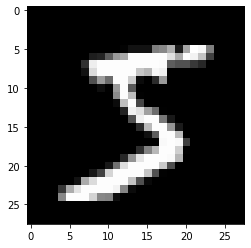

In [2]:
from matplotlib import pyplot as plt

plt.imshow(train_data[0],cmap='gray')
plt.show()

In [3]:
print(train_target[0])

5


In [4]:
train_data= train_data / 255.0 
test_data=test_data/255.0
#Scaling the 0-255 gray image to 0-1 (Requirement before training the Neural Network)

In [5]:
from keras.models import Sequential
#loading Sequential model from keras
from keras.layers import Flatten,Dense
#loading Flatten and Dense layers from keras

model = Sequential()
#creating a Sequential type neural network (a empty neural network, add layer by layer)
model.add(Flatten(input_shape=(28, 28)))
#a flatten layer to flatten up the 28x28 input image into 784 inputs
model.add(Dense(512, activation='relu'))
#1st Hidden layer with 512 Neurons
model.add(Dense(256, activation='relu'))
#2nd Hidden layer with 256 Neurons
model.add(Dense(10, activation='softmax'))
#output layer with 10 output neurons
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
#compiling the neural network with necessary parameters

model.summary()
#neural network architecture and parameters

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [6]:
from keras.utils import np_utils

train_target=np_utils.to_categorical(train_target)
#convering the labels into a categorical representation

history=model.fit(train_data, train_target, epochs=20,validation_split=0.1)
#training the neural network for 50 epochs

Epoch 1/20
1688/1688 [==============================] - 12s 7ms/step - loss: 0.1963 - accuracy: 0.9408 - val_loss: 0.1018 - val_accuracy: 0.9697
Epoch 2/20
1688/1688 [==============================] - 11s 7ms/step - loss: 0.0826 - accuracy: 0.9745 - val_loss: 0.0751 - val_accuracy: 0.9780
Epoch 3/20
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0571 - accuracy: 0.9823 - val_loss: 0.0697 - val_accuracy: 0.9795
Epoch 4/20
1688/1688 [==============================] - 11s 6ms/step - loss: 0.0433 - accuracy: 0.9866 - val_loss: 0.0730 - val_accuracy: 0.9800
Epoch 5/20
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0327 - accuracy: 0.9892 - val_loss: 0.0761 - val_accuracy: 0.9800
Epoch 6/20
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0285 - accuracy: 0.9902 - val_loss: 0.0729 - val_accuracy: 0.9833
Epoch 7/20
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0255 - accuracy: 0.9920 - val_loss: 0.0916 - val_ac

In [7]:
results=model.predict(test_data)
print(results[:10])
#testing and getting results using unseen data

[[1.1078403e-24 5.1536446e-18 1.0200145e-16 9.5101342e-14 7.4994757e-27
  4.0682977e-23 8.5854130e-26 1.0000000e+00 2.1151541e-20 9.8376058e-16]
 [1.3342804e-28 9.3623172e-18 1.0000000e+00 1.2805778e-21 0.0000000e+00
  3.2215869e-34 1.0751473e-35 1.0071733e-32 1.2154896e-33 3.4792419e-38]
 [2.1197006e-21 1.0000000e+00 1.8386070e-16 3.3462377e-29 6.3966303e-20
  4.0588595e-22 6.0528948e-16 6.6455914e-18 1.1659495e-19 3.1275530e-23]
 [1.0000000e+00 1.3957217e-16 4.1030567e-14 1.6714491e-15 3.0075399e-14
  3.1804658e-16 4.8794736e-11 2.7876272e-18 1.8861083e-19 2.6362140e-10]
 [6.9166413e-12 3.4702987e-12 3.3722246e-13 2.6362156e-15 9.9978954e-01
  7.3947962e-17 1.3567183e-14 9.7726917e-11 1.8529282e-15 2.1044497e-04]
 [2.2441417e-22 1.0000000e+00 1.9012020e-23 1.0059379e-30 2.2610378e-20
  8.7571252e-24 1.2147167e-16 5.2296504e-19 1.2965246e-19 5.1574835e-24]
 [3.3434257e-17 1.5796011e-15 4.5046737e-15 3.9904207e-21 1.0000000e+00
  1.9780967e-14 7.0439925e-15 1.3458062e-15 9.0114152e-11 

In [8]:
import numpy as np
results=np.argmax(results,axis=1)

In [9]:
print(test_target[:10])
print(results[:10])

[7 2 1 0 4 1 4 9 5 9]
[7 2 1 0 4 1 4 9 6 9]


In [10]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(test_target,results)
print('Accuracy:',accuracy)
#getting the accuracy between the actual and predicted results

Accuracy: 0.9823


Text(0, 0.5, 'loss')

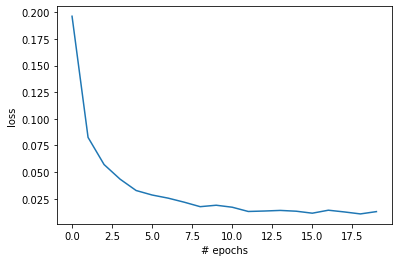

In [11]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('# epochs')
plt.ylabel('loss')
#visualizing the loss

Text(0, 0.5, 'accuracy')

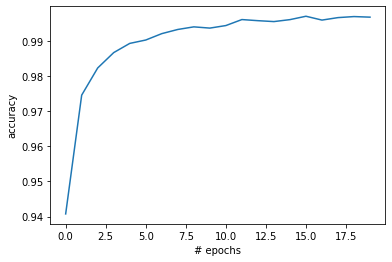

In [13]:
plt.plot(history.history['accuracy'])
plt.xlabel('# epochs')
plt.ylabel('accuracy')
#visualizing the accuracy

In [14]:
model.save_weights('FFNN-MNIST.h5')